In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
os.chdir('/Users/rohilzalke/Desktop/DataSet')

In [7]:
data = pd.read_csv('concrete_data.csv')

In [9]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [13]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [19]:
data.duplicated().sum()

25

In [23]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [76]:
columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'concrete_compressive_strength']

#### Distribution of numerical features

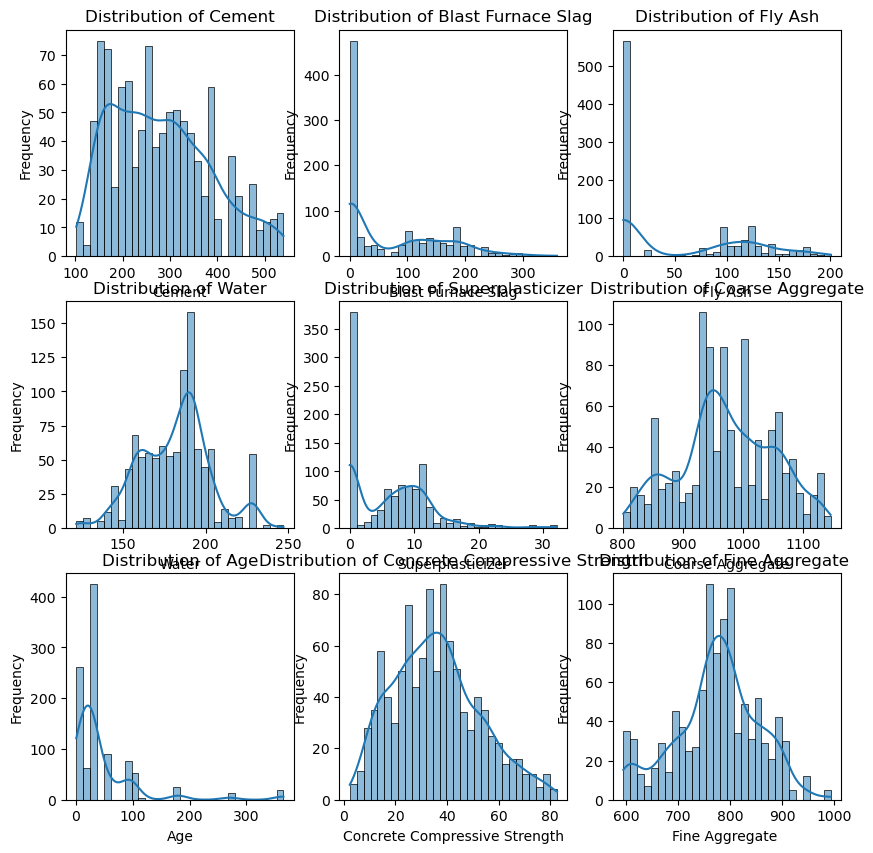

In [71]:
columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'age', 'concrete_compressive_strength', 'fine_aggregate ']
plt.figure(figsize=(10,10))
for i, col in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Frequency")

plt.show()


#### Box Plots to identify outliers

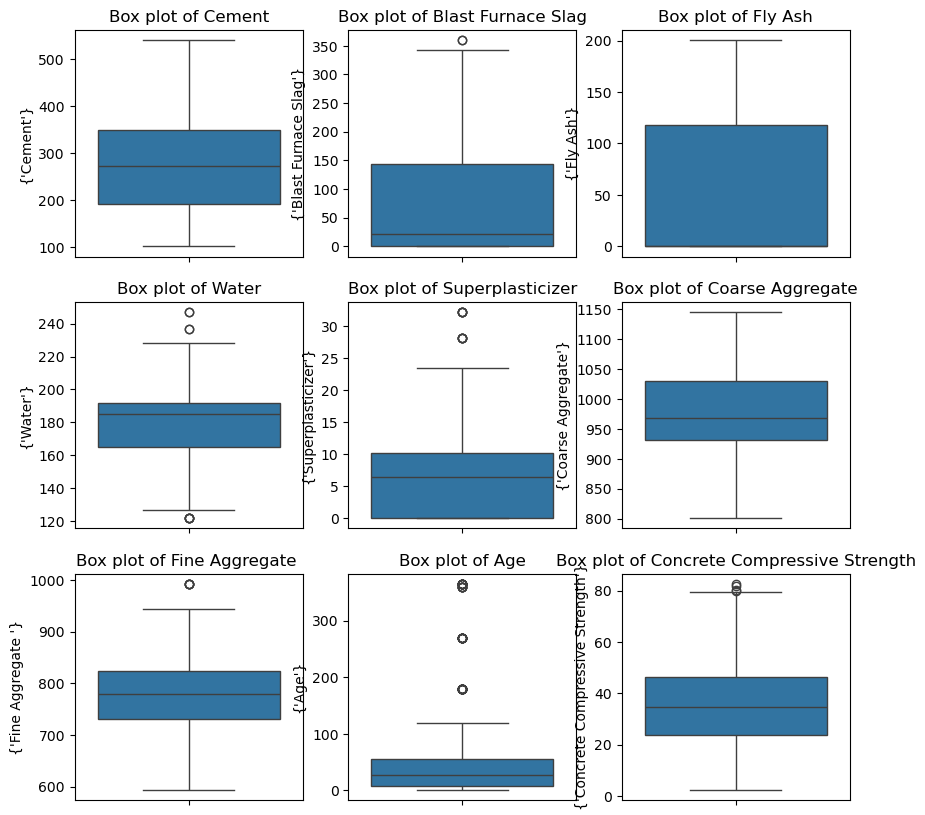

In [80]:
plt.figure(figsize = (10,10))
for i, col in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[col])
    plt.title(f'Box plot of {col.replace("_", " ").title()}')
    plt.ylabel({col.replace("_", " ").title()})
plt.show()

#### Bivariate Analysis (Relationships Between Columns)

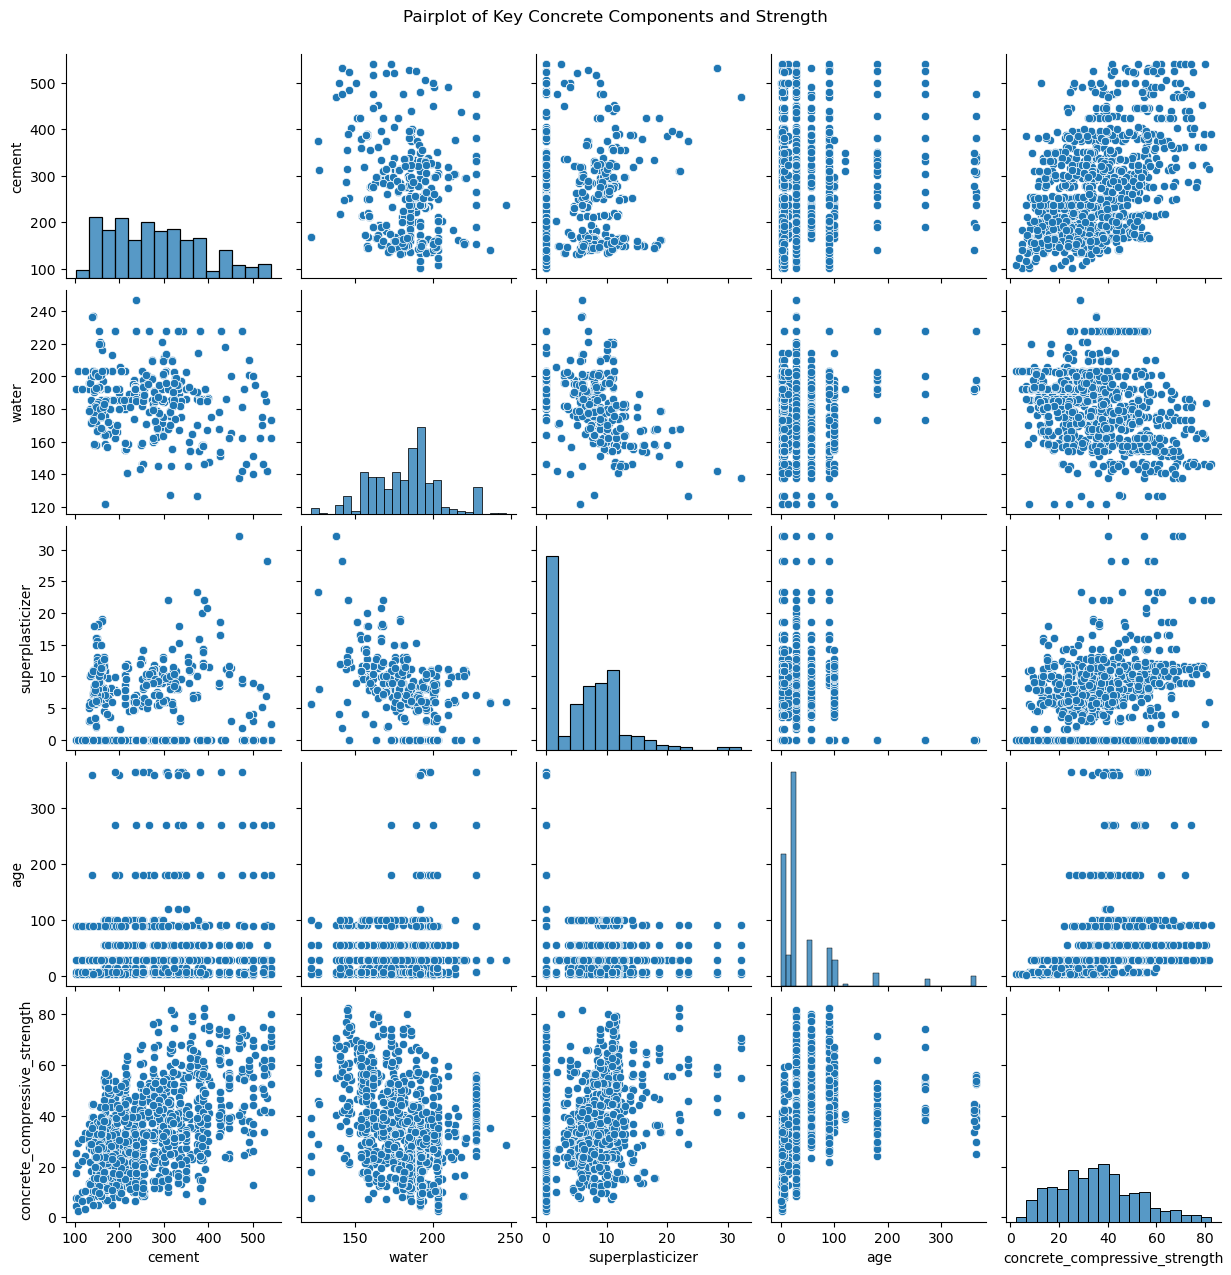

In [89]:
sns.pairplot(data[['cement', 'water', 'superplasticizer', 'age', 'concrete_compressive_strength']])
plt.suptitle('Pairplot of Key Concrete Components and Strength', y=1.02) # Adjust title position
plt.show()

In [ ]:
#Correlation Matrix Heatmap - crucial for understanding linear relationships

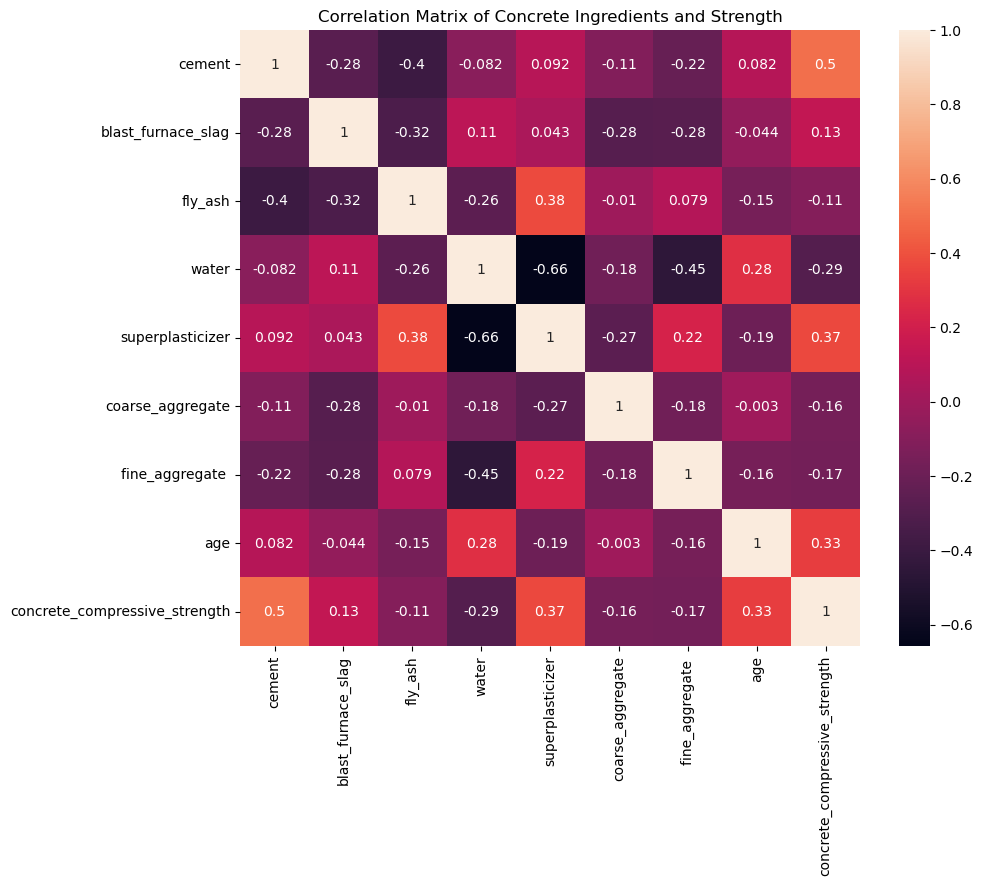

In [97]:
correlation_matrix = data.corr(numeric_only=True) 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, )
plt.title('Correlation Matrix of Concrete Ingredients and Strength')
plt.show()

In [99]:
# Scatter plots of individual features vs. Compressive Strength

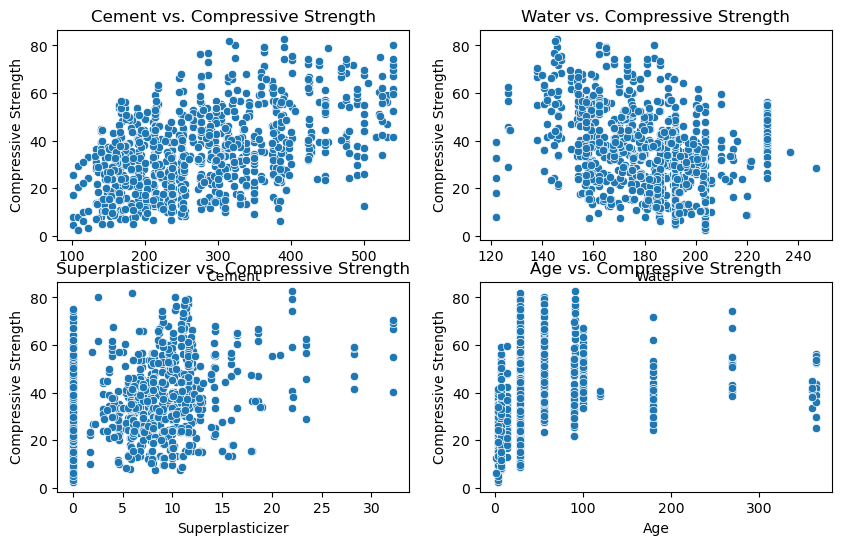

In [107]:
f = ['cement', 'water', 'superplasticizer', 'age']
plt.figure(figsize=(10,6))
for i, col in enumerate(f):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = col, y = 'concrete_compressive_strength', data=data)
    plt.title(f'{col.replace("_", " ").title()} vs. Compressive Strength')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Compressive Strength')

plt.show()

### Key Findings & Insights
**Dataset Overview:** The dataset contains `[df.shape[0]]` entries and `[df.shape[1]]` features. It's largely clean, with `[df.isnull().sum().sum()]` missing values (confirm this is 0) but `[df.duplicated().sum()]` duplicate rows were identified. (You should remove these duplicates at the start of your notebook, after confirming their presence).
* **Distribution of Ingredients:**
    * (e.g., "Cement content appears to be somewhat normally distributed, while Fly Ash and Superplasticizer show right-skewed distributions, indicating fewer concrete mixes use very high amounts of these ingredients.")
    * (Mention any significant outliers identified in box plots, e.g., "Age shows a few outliers at very high values, suggesting some samples were tested much later.")
* **Correlation with Compressive Strength:**
    * **Positive Correlations:** "Compressive strength shows a strong positive correlation with `cement` content and `age`. This is expected as higher cement content typically leads to stronger concrete, and concrete gains strength over time."
    * **Negative Correlations:** "A notable negative correlation is observed with `water` content, reinforcing the principle that a higher water-cement ratio generally leads to lower strength."
    * (Mention `superplasticizer`'s role, as it allows for lower water content while maintaining workability, thereby improving strength.)
* **Inter-feature Relationships:**
    * (e.g., "There's a negative correlation between `water` and `superplasticizer`, which makes sense as superplasticizers reduce the need for water to achieve desired workability.")
* **Potential Areas for Further Analysis:**
    * "Investigate the impact of outliers in 'Age' on concrete strength."
    * "Explore interaction effects, e.g., how the ratio of water to cement and superplasticizer affects strength."
    * "Consider non-linear relationships for some features, as implied by scatter plots."